# Fraud Detection in Financial Transactions

This Python code implements a fraud detection system for financial transactions. It utilizes machine learning to classify transactions as either fraudulent or non-fraudulent based on provided features.

## Overview

The `FraudDetector` class provides functionality to:

- Load and preprocess financial transaction data from a CSV file.
- Handle missing values through simple imputation.
- Scale numerical features for better model performance.
- Split the data into training and testing sets.
- Train a classification model (default is Random Forest) to detect fraud.
- Predict fraud on new, unseen transaction data.
- Evaluate the trained model using accuracy, classification report, and a confusion matrix.

## Getting Started

### Prerequisites

- Python 3.x
- Pandas (`pip install pandas`)
- Scikit-learn (`pip install scikit-learn`)
- Matplotlib (`pip install matplotlib`)
- Seaborn (`pip install seaborn`)

### Installation

1.  **Clone the repository** (if you have one) or **download the `fraud_detection.py` file.**

2.  **Ensure you have your financial transaction data in a CSV file.** The CSV should contain features relevant to the transactions and a target column indicating whether a transaction is fraudulent (e.g., 0 for non-fraud, 1 for fraud).

## Usage

1.  **Import the `FraudDetector` class** in your Python script or interactive environment:

    ```python
    from fraud_detection import FraudDetector
    import pandas as pd
    ```

2.  **Initialize the `FraudDetector`** with the path to your data file:

    ```python
    data_file = 'your_transaction_data.csv'  # Replace with your file path
    fraud_detector = FraudDetector(data_file)
    ```

3.  **Define the features** you want to use for fraud detection and the name of your target column:

    ```python
    features_to_use = ['amount', 'transaction_type', 'account_balance_change', 'merchant_id', 'user_id', 'transaction_hour'] # Replace with your actual feature names
    target_column = 'is_fraud' # Replace with your target column name
    ```

4.  **Load and preprocess the data:**

    ```python
    fraud_detector.load_and_preprocess_data(features=features_to_use, target=target_column)
    ```

5.  **Train the fraud detection model:**

    ```python
    fraud_detector.train_model() # Uses RandomForestClassifier by default
    # You can also specify a different model:
    # from sklearn.linear_model import LogisticRegression
    # fraud_detector.train_model(model=LogisticRegression())
    ```

6.  **Evaluate the model:**

    ```python
    fraud_detector.evaluate_model()
    # This will print the accuracy, classification report, and display a confusion matrix.
    ```

7.  **Predict fraud on new data:**

    ```python
    new_transactions = pd.DataFrame({
        'amount': [1500, 20, 10000],
        'transaction_type': ['credit', 'debit', 'credit'],
        'account_balance_change': [1500, -20, 10000],
        'merchant_id': [7, 3, 2],
        'user_id': [108, 101, 103],
        'transaction_hour': [16, 9, 22]
        # Add all the features you used for training here
    })
    predictions = fraud_detector.predict_fraud(new_transactions)
    if predictions is not None:
        print("\nFraud Predictions for New Transactions:")
        print(predictions)
    ```

## Data Format

The CSV file containing your transaction data should have columns corresponding to the features you intend to use for prediction and a target column indicating the fraud status (e.g., 0 or 1, True or False).

## Model

The code uses a `RandomForestClassifier` from scikit-learn as the default fraud detection model. You can easily integrate other classification models supported by scikit-learn by passing them to the `train_model()` method.

## Evaluation

The `evaluate_model()` method provides standard classification metrics:

-   **Accuracy:** The overall correctness of the model's predictions.
-   **Classification Report:** Includes precision, recall, F1-score, and support for each class (fraudulent and non-fraudulent).
-   **Confusion Matrix:** A table showing the counts of true positives, true negatives, false positives, and false negatives.

## Potential Improvements

-   **Feature Engineering:** Create new relevant features from the existing data.
-   **Handling Imbalanced Data:** Implement techniques like oversampling, undersampling, or using class weights if your dataset has a significant class imbalance.
-   **More Sophisticated Missing Value Imputation:** Explore more advanced methods for handling missing data.
-   **Hyperparameter Tuning:** Optimize the hyperparameters of the chosen model for better performance.
-   **Cross-Validation:** Use cross-validation during training for a more robust evaluation.
-   **Different Models:** Experiment with other classification algorithms.
-   **Explainability:** Integrate techniques to understand why certain transactions are flagged as fraudulent.
-   **Real-time Integration:** Adapt the code for real-time fraud detection in a transaction processing pipeline.

## Contributing

Contributions to this project are welcome. Feel free to submit pull requests or open issues for bug fixes or new features.

## License

[Specify your license here, e.g., MIT License]

Data loaded and preprocessed.
Model training complete.
Evaluation Metrics:
Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


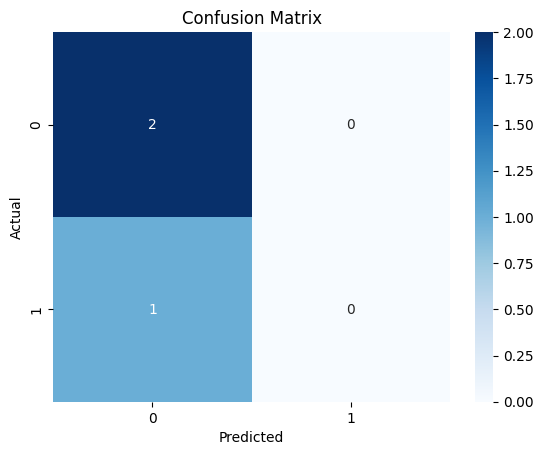


Fraud Predictions for New Transactions:
0    0
1    0
2    1
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

class FraudDetector:
    def __init__(self, data_path):
        """
        Initializes the FraudDetector with the path to the transaction data.

        Args:
            data_path (str): Path to the CSV file containing transaction data.
                             The CSV should have features representing transaction details
                             and a binary target variable indicating fraud (e.g., 0 for no fraud, 1 for fraud).
        """
        self.data_path = data_path
        self.df = None
        self.model = None
        self.scaler = StandardScaler()
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.encoded_features = None # To store the list of feature names after encoding

    def load_and_preprocess_data(self, features, target='is_fraud'):
        """
        Loads the data, handles missing values (simple imputation), performs one-hot encoding
        for categorical features, and scales numerical features.

        Args:
            features (list): List of column names to be used as features.
            target (str): Name of the target variable column.
        """
        try:
            self.df = pd.read_csv(self.data_path)
        except FileNotFoundError:
            print(f"Error: File not found at {self.data_path}")
            return

        if target not in self.df.columns or not all(feature in self.df.columns for feature in features):
            print("Error: Target column or one or more feature columns not found in the data.")
            return

        self.df = self.df[features + [target]].copy()

        # Handle missing values (simple imputation with mean/mode)
        for col in self.df.columns:
            if self.df[col].isnull().any():
                if pd.api.types.is_numeric_dtype(self.df[col]):
                    self.df[col].fillna(self.df[col].mean(), inplace=True)
                else:
                    # For categorical, use mode. pd.get_dummies handles NaNs by default but good practice.
                    # If a column is intended to be categorical but has numeric dtype, this might cause issues.
                    # A more robust approach would involve explicitly identifying categorical columns.
                    if pd.api.types.is_object_dtype(self.df[col]) or pd.api.types.is_categorical_dtype(self.df[col]):
                         self.df[col].fillna(self.df[col].mode()[0], inplace=True)


        # Separate features and target before encoding the features
        X = self.df[features]
        y = self.df[target]

        # Identify categorical columns for one-hot encoding
        categorical_features = X.select_dtypes(include=['object', 'category']).columns
        numerical_features = X.select_dtypes(include=['number']).columns

        # Apply one-hot encoding to categorical features
        X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

        # Store the feature names after encoding for prediction consistency
        self.encoded_features = X.columns.tolist()

        # Split data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

        # Scale numerical features (only on the numerical columns *after* one-hot encoding)
        # Note: The scaled features will be added back to the one-hot encoded features
        # We need to identify the columns that were originally numerical but now might be mixed with new dummy columns
        # A cleaner way is to apply scaling *after* splitting and encoding, only to the identified numerical columns
        # Let's redo the scaling part to be more robust after one-hot encoding

        # Separate numerical and dummy columns from the encoded data
        numerical_cols_after_encoding = [col for col in self.X_train.columns if col in numerical_features]
        dummy_cols_after_encoding_train = self.X_train.columns.difference(numerical_cols_after_encoding)
        dummy_cols_after_encoding_test = self.X_test.columns.difference(numerical_cols_after_encoding)


        # Scale only the numerical columns
        if numerical_cols_after_encoding:
            self.X_train[numerical_cols_after_encoding] = self.scaler.fit_transform(self.X_train[numerical_cols_after_encoding])
            self.X_test[numerical_cols_after_encoding] = self.scaler.transform(self.X_test[numerical_cols_after_encoding])

        # Ensure the order of columns is the same in train and test after all transformations
        self.X_test = self.X_test[self.X_train.columns]


        print("Data loaded and preprocessed.")

    def train_model(self, model=RandomForestClassifier(random_state=42)):
        """
        Trains a fraud detection model (default is Random Forest).

        Args:
            model: The classification model to train. Defaults to RandomForestClassifier.
        """
        if self.X_train is None or self.y_train is None:
            print("Error: Data not loaded and preprocessed. Call 'load_and_preprocess_data' first.")
            return

        self.model = model
        self.model.fit(self.X_train, self.y_train)
        print("Model training complete.")

    def predict_fraud(self, new_data):
        """
        Predicts fraud for new transaction data.

        Args:
            new_data (pd.DataFrame): DataFrame containing new transaction data with the same features
                                      used for training (before encoding).

        Returns:
            pd.Series: Predictions (0 or 1) for each transaction in the new data.
                      Returns None if the model is not trained or the features don't match.
        """
        if self.model is None or self.encoded_features is None or self.scaler is None:
            print("Error: Model not trained or data preprocessing information missing. Call 'train_model' first.")
            return None

        # Check if new data has the original features used for preprocessing
        original_features_used = [col for col in self.df.columns if col != 'is_fraud'] # Assuming 'is_fraud' is the target
        if not all(col in new_data.columns for col in original_features_used):
             missing_cols = [col for col in original_features_used if col not in new_data.columns]
             print(f"Error: New data does not contain all the required original features used for training. Missing: {missing_cols}")
             return None


        # Apply the same preprocessing steps as the training data
        # Handle missing values in new_data (using mean/mode from training data if possible, but for simplicity, using new data's stats here)
        # A more robust approach would be to save and use the imputation values from the training data.
        for col in new_data.columns:
             if new_data[col].isnull().any():
                 if pd.api.types.is_numeric_dtype(new_data[col]):
                     # Ideally use training data's mean, using new data's mean for simplicity
                     new_data[col].fillna(new_data[col].mean(), inplace=True)
                 else:
                      # Ideally use training data's mode, using new data's mode for simplicity
                      if pd.api.types.is_object_dtype(new_data[col]) or pd.api.types.is_categorical_dtype(new_data[col]):
                           new_data[col].fillna(new_data[col].mode()[0], inplace=True)


        # Identify categorical columns based on original feature types
        categorical_features = new_data.select_dtypes(include=['object', 'category']).columns
        numerical_features = new_data.select_dtypes(include=['number']).columns


        # Apply one-hot encoding to new data, ensuring consistent columns
        new_data_processed = pd.get_dummies(new_data, columns=categorical_features, drop_first=True)

        # Ensure all columns from training data exist in the new data after encoding, fill with 0 if not
        for col in self.encoded_features:
            if col not in new_data_processed.columns:
                new_data_processed[col] = 0

        # Ensure the order of columns in new_data_processed matches the training data
        new_data_processed = new_data_processed[self.encoded_features]

        # Scale numerical features in the new data using the fitted scaler from training
        # Need to identify numerical columns among the encoded features
        numerical_cols_after_encoding_predict = [col for col in self.encoded_features if col in numerical_features]

        if numerical_cols_after_encoding_predict:
             new_data_processed[numerical_cols_after_encoding_predict] = self.scaler.transform(new_data_processed[numerical_cols_after_encoding_predict])


        predictions = self.model.predict(new_data_processed)
        return pd.Series(predictions)

    def evaluate_model(self):
        """
        Evaluates the trained model on the test set and prints classification report and confusion matrix.
        """
        if self.model is None or self.X_test is None or self.y_test is None:
            print("Error: Model not trained or test data not available.")
            return

        y_pred = self.model.predict(self.X_test)

        print("Evaluation Metrics:")
        print("Accuracy:", accuracy_score(self.y_test, y_pred))
        print("\nClassification Report:")
        print(classification_report(self.y_test, y_pred))
        print("\nConfusion Matrix:")
        cm = confusion_matrix(self.y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

# --- Example Usage ---
if __name__ == "__main__":
    # Assuming you have a CSV file named 'fraud_data.csv' with transaction details
    # and a column named 'is_fraud' (0 for no fraud, 1 for fraud)
    data_file = 'fraud_data.csv'

    # Define the features to be used for fraud detection
    features_to_use = ['amount', 'transaction_type', 'account_balance_change',
                       'merchant_id', 'user_id', 'transaction_hour'] # Add your actual feature names

    # Create a sample 'fraud_data.csv' for demonstration purposes
    sample_data = {
        'amount': [100, 5000, 25, 10000, 75, 200, 15000, 30, 500, 1000],
        'transaction_type': ['debit', 'credit', 'debit', 'credit', 'debit', 'debit', 'credit', 'debit', 'credit', 'debit'],
        'account_balance_change': [-100, 5000, -25, 10000, -75, -200, 15000, -30, 500, -1000],
        'merchant_id': [1, 2, 3, 2, 1, 4, 2, 3, 5, 1],
        'user_id': [101, 102, 101, 103, 102, 104, 103, 101, 105, 102],
        'transaction_hour': [10, 14, 9, 18, 11, 16, 20, 8, 12, 15],
        'is_fraud': [0, 1, 0, 1, 0, 0, 1, 0, 0, 0]
    }
    sample_df = pd.DataFrame(sample_data)
    sample_df.to_csv(data_file, index=False)

    # Initialize the FraudDetector
    fraud_detector = FraudDetector(data_file)

    # Load and preprocess the data
    fraud_detector.load_and_preprocess_data(features=features_to_use, target='is_fraud')

    # Train the fraud detection model
    fraud_detector.train_model()

    # Evaluate the model
    fraud_detector.evaluate_model()

    # Predict fraud on new, unseen data
    new_transactions = pd.DataFrame({
        'amount': [2000, 50, 12000],
        'transaction_type': ['credit', 'debit', 'credit'],
        'account_balance_change': [2000, -50, 12000],
        'merchant_id': [6, 3, 2],
        'user_id': [106, 101, 103],
        'transaction_hour': [15, 10, 21]
    })
    predictions = fraud_detector.predict_fraud(new_transactions)
    if predictions is not None:
        print("\nFraud Predictions for New Transactions:")
        print(predictions)